# NumPy Basics: Arrays and Vectorized Computation

In [2]:
from __future__ import division
from numpy.random import randn
from numpy.linalg import inv, qr
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

## The NumPy ndarray: a multidimensional array object

In [165]:
data = randn(2, 3)
data

array([[-0.4706, -0.9192, -0.8388],
       [ 0.4352, -0.5578, -0.5675]])

In [166]:
print(f"{data * 10=}")
print(f"{data * data=}")
print(f"{data ** 0.5=}")
print(f"{data + data=}")
print(f"{data - data=}")
print(f"{1 / data=}")
print(f"{data.dtype=}\n{data.shape=}")

data * 10=array([[-4.7063, -9.1924, -8.3883],
       [ 4.3516, -5.578 , -5.6745]])
data * data=array([[0.2215, 0.845 , 0.7036],
       [0.1894, 0.3111, 0.322 ]])
data ** 0.5=array([[   nan,    nan,    nan],
       [0.6597,    nan,    nan]])
data + data=array([[-0.9413, -1.8385, -1.6777],
       [ 0.8703, -1.1156, -1.1349]])
data - data=array([[0., 0., 0.],
       [0., 0., 0.]])
1 / data=array([[-2.1248, -1.0879, -1.1921],
       [ 2.298 , -1.7927, -1.7623]])
data.dtype=dtype('float64')
data.shape=(2, 3)


<ipython-input-166-4377fb11825f>:3: RuntimeWarning: invalid value encountered in sqrt
  print(f"{data ** 0.5=}")


### Creating ndarrays

In [167]:
# array convert any sequence to ndarray.
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)

print(f"{arr1=}")
print(f"{arr1.ndim=}")
print(f"{arr1.shape=}")
print(f"{arr1.dtype=}")

print(f"{arr2=}")
print(f"{arr2.ndim=}")
print(f"{arr2.shape=}")
print(f"{arr2.dtype=}")

arr1=array([6. , 7.5, 8. , 0. , 1. ])
arr1.ndim=1
arr1.shape=(5,)
arr1.dtype=dtype('float64')
arr2=array([[1, 2, 3, 4],
       [5, 6, 7, 8]])
arr2.ndim=2
arr2.shape=(2, 4)
arr2.dtype=dtype('int64')


In [168]:
# NB! Array's elements not initiated, but it not empty.
not_empty = np.empty((2, 3, 2))
print(f"{not_empty=}")
print(f"{not_empty.max()=}")

print(f"{np.zeros(10)=}")
print(f"{np.ones(10)=}")
print(f"{np.zeros((3, 6))=}")

print(f"{np.ones_like(arr2)=}")
print(f"{np.zeros_like(arr2)=}")

print(f"{np.eye(5)=}")
print(f"{np.identity(3)=}")

not_empty=array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])
not_empty.max()=4.65466656651797e-310
np.zeros(10)=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
np.ones(10)=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
np.zeros((3, 6))=array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])
np.ones_like(arr2)=array([[1, 1, 1, 1],
       [1, 1, 1, 1]])
np.zeros_like(arr2)=array([[0, 0, 0, 0],
       [0, 0, 0, 0]])
np.eye(5)=array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])
np.identity(3)=array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])


In [169]:
# Like range in Python.
print(f"{np.arange(15)=}")

np.arange(15)=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])


### Data Types for ndarrays

In [170]:
arr_float = np.array([1.4, 2.9, 3.1], dtype=np.float64)
arr_int = np.array([1, 2, 3], dtype=np.int32)
arr_float_converted = arr_int.astype(np.float64)  #NB! Digits after point will be throwing away.
arr_int_converted = arr_float.astype(np.int32)

print(f"{arr1.dtype=}")
print(f"{arr2.dtype=}")
print(f"{arr_int_converted=}")
print(f"{arr_float_converted.dtype=}")

arr1.dtype=dtype('float64')
arr2.dtype=dtype('int64')
arr_int_converted=array([1, 2, 3], dtype=int32)
arr_float_converted.dtype=dtype('float64')


In [171]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [172]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [173]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32.dtype

dtype('uint32')

### Basic indexing and slicing
### NB! Slicing of ndarray is a view.

In [174]:
arr = np.arange(10)
arr_slice = arr[5:8]   # To get a copy - arr[5:8].copy()
arr_slice[1] = 12345
print(arr)
arr_slice[:] = 64
print(arr)

[    0     1     2     3     4     5 12345     7     8     9]
[ 0  1  2  3  4 64 64 64  8  9]


In [175]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [176]:
print(f"{arr2d[0][2]=}")
print(f"{arr2d[0, 2]=}")

arr2d[0][2]=3
arr2d[0, 2]=3


In [177]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

print(f"{arr3d=}")
print(f"{arr3d[0]=}")

old_values = arr3d[0].copy()
arr3d[0] = 42
print(f"{arr3d=}")
arr3d[0] = old_values
print(f"{arr3d=}")
print(f"{arr3d[1, 0]=}")

arr3d=array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])
arr3d[0]=array([[1, 2, 3],
       [4, 5, 6]])
arr3d=array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])
arr3d=array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])
arr3d[1, 0]=array([7, 8, 9])


### Boolean indexing

In [178]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)
print(f"{names=}")
print(f"{data=}")

names=array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')
data=array([[-0.3726, -0.9266,  1.7551,  1.2098],
       [ 1.27  , -0.9744, -0.6347, -0.3957],
       [-0.2894, -0.7343, -0.7285,  0.8388],
       [ 0.2669,  0.7212,  0.911 , -1.0209],
       [-1.4134,  1.2966,  0.2523,  1.1275],
       [-0.5684,  0.3094, -0.5774, -1.1686],
       [-0.825 , -2.6444, -0.153 , -0.7519]])


In [179]:
print(f"{names == 'Bob'=}")
print(f"{data[names == 'Bob']=}")  # Boolean indexing

# Boolean index + slicing
print(f"{data[names == 'Bob', 2:]}")
print(f"{data[names == 'Bob', 3]}")

names == 'Bob'=array([ True, False, False,  True, False, False, False])
data[names == 'Bob']=array([[-0.3726, -0.9266,  1.7551,  1.2098],
       [ 0.2669,  0.7212,  0.911 , -1.0209]])
[[ 1.7551  1.2098]
 [ 0.911  -1.0209]]
[ 1.2098 -1.0209]


In [180]:
print(f"{~(names == 'Bob')=}")  # NB! (~) => (-)
print(f"  {names != 'Bob' =}")
data[~(names == 'Bob')]  #

~(names == 'Bob')=array([False,  True,  True, False,  True,  True,  True])
  names != 'Bob' =array([False,  True,  True, False,  True,  True,  True])


array([[ 1.27  , -0.9744, -0.6347, -0.3957],
       [-0.2894, -0.7343, -0.7285,  0.8388],
       [-1.4134,  1.2966,  0.2523,  1.1275],
       [-0.5684,  0.3094, -0.5774, -1.1686],
       [-0.825 , -2.6444, -0.153 , -0.7519]])

### & - AND
### | - OR

In [181]:
mask = (names == 'Bob') | (names == 'Will')  # complex boolean condition
print(f"{mask=}")
print(f"{data[mask]=}")


mask=array([ True, False,  True,  True,  True, False, False])
data[mask]=array([[-0.3726, -0.9266,  1.7551,  1.2098],
       [-0.2894, -0.7343, -0.7285,  0.8388],
       [ 0.2669,  0.7212,  0.911 , -1.0209],
       [-1.4134,  1.2966,  0.2523,  1.1275]])


In [182]:
data[data < 0] = 0
data

array([[0.    , 0.    , 1.7551, 1.2098],
       [1.27  , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.8388],
       [0.2669, 0.7212, 0.911 , 0.    ],
       [0.    , 1.2966, 0.2523, 1.1275],
       [0.    , 0.3094, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [183]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.27  , 0.    , 0.    , 0.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.3094, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

### Fancy indexing
### NB! Creating new array

In [184]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [185]:
print(f"{arr[[4, 3, 0, 6]]=}")
print(f"{arr[[-3, -5, -7]]=}")

arr[[4, 3, 0, 6]]=array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])
arr[[-3, -5, -7]]=array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])


In [186]:
# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
print(f"{arr=}")

# Indexing by pair of digits
arr[
    [1, 5, 7, 2],
    [0, 3, 1, 2]
]

arr=array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])


array([ 4, 23, 29, 10])

In [187]:
arr[
    [1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [188]:
arr[np.ix_(
    [1, 5, 7, 2],
    [0, 3, 1, 2]
)]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing arrays and swapping axes

In [189]:
arr = np.arange(15).reshape((3, 5))
print(f"{arr=}")
arr.T

arr=array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])


array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [190]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 4.5136, -2.15  ,  0.1238],
       [-2.15  ,  6.4147,  3.2101],
       [ 0.1238,  3.2101,  5.5077]])

In [191]:
arr = np.arange(16).reshape((2, 2, 4))
print(f"{arr=}")
arr.transpose((1, 0, 2))  # Axes number.

arr=array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])


array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [192]:
print(f"{arr=}")
arr.swapaxes(1, 2)  # NB! Also return view.

arr=array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])


array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast element-wise array functions

In [193]:
arr = randn(7) * 5
print(f"{arr=}")
print(f"{np.sqrt(arr)=}")
print(f"{np.exp(arr)=}")
print(f"{np.maximum(arr, arr*2)=}")  # element-wise maximum
print(f"{np.modf(arr)=}")  # return int and float parts of digit

arr=array([ 0.4547, -1.7505,  1.0898, -4.4741, -8.7075, -5.2613,  7.183 ])
np.sqrt(arr)=array([0.6743,    nan, 1.0439,    nan,    nan,    nan, 2.6801])
np.exp(arr)=array([   1.5757,    0.1737,    2.9736,    0.0114,    0.0002,    0.0052,
       1316.8712])
np.maximum(arr, arr*2)=array([ 0.9094, -1.7505,  2.1796, -4.4741, -8.7075, -5.2613, 14.366 ])
np.modf(arr)=(array([ 0.4547, -0.7505,  0.0898, -0.4741, -0.7075, -0.2613,  0.183 ]), array([ 0., -1.,  1., -4., -8., -5.,  7.]))


<ipython-input-193-835cd0b59843>:3: RuntimeWarning: invalid value encountered in sqrt
  print(f"{np.sqrt(arr)=}")


## Data processing using arrays

In [194]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

[[7.0711 7.064  7.0569 ... 7.0499 7.0569 7.064 ]
 [7.064  7.0569 7.0499 ... 7.0428 7.0499 7.0569]
 [7.0569 7.0499 7.0428 ... 7.0357 7.0428 7.0499]
 ...
 [7.0499 7.0428 7.0357 ... 7.0286 7.0357 7.0428]
 [7.0569 7.0499 7.0428 ... 7.0357 7.0428 7.0499]
 [7.064  7.0569 7.0499 ... 7.0428 7.0499 7.0569]]


Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

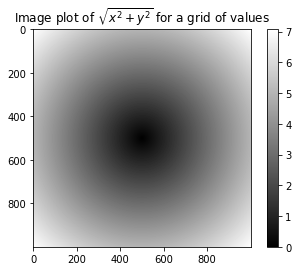

In [195]:
z = np.sqrt(xs ** 2 + ys ** 2)
print(z)
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### Expressing conditional logic as array operations

In [196]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [197]:
result_if = [
    (x if c else y)
    for x, y, c in zip(xarr, yarr, cond)
]
result_where = np.where(cond, xarr, yarr)
print(f"{result_if == result_where=}\n{result_if=}\n{result_where=}")

result_if == result_where=array([ True,  True,  True,  True,  True])
result_if=[1.1, 2.2, 1.3, 1.4, 2.5]
result_where=array([1.1, 2.2, 1.3, 1.4, 2.5])


In [198]:
arr = randn(4, 4)
print(f"{arr=}")
print(f"{np.where(arr > 0, 2, -2)=}")
print(f"{np.where(arr > 0, 2, arr)=}")  # set only positive values to 2

arr=array([[-0.5762, -2.4203, -1.0623,  0.2374],
       [ 0.001 ,  0.0653, -1.3675, -0.0303],
       [ 0.9405, -0.6424,  1.0402, -1.0829],
       [ 0.4292, -0.2362,  0.6418, -0.3317]])
np.where(arr > 0, 2, -2)=array([[-2, -2, -2,  2],
       [ 2,  2, -2, -2],
       [ 2, -2,  2, -2],
       [ 2, -2,  2, -2]])
np.where(arr > 0, 2, arr)=array([[-0.5762, -2.4203, -1.0623,  2.    ],
       [ 2.    ,  2.    , -1.3675, -0.0303],
       [ 2.    , -0.6424,  2.    , -1.0829],
       [ 2.    , -0.2362,  2.    , -0.3317]])


In [199]:
# Where can be multilevel
"""
result = []
for i in range(n):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)

np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))
"""

'\nresult = []\nfor i in range(n):\n    if cond1[i] and cond2[i]:\n        result.append(0)\n    elif cond1[i]:\n        result.append(1)\n    elif cond2[i]:\n        result.append(2)\n    else:\n        result.append(3)\n\nnp.where(cond1 & cond2, 0,\n         np.where(cond1, 1,\n                  np.where(cond2, 2, 3)))\n'

### Mathematical and statistical methods

In [200]:
arr = np.random.randn(5, 4)  # normally-distributed data
print(f"{arr=}")
print(f"{arr.mean()=}")
print(f"{arr.mean(axis=1)=}")
print(f"{np.mean(arr)=}")
print(f"{arr.sum()=}")
print(f"{arr.sum(0)=}")

arr=array([[ 1.3941, -1.0767, -0.1925, -0.8712],
       [ 0.4209, -1.2114, -0.2589, -0.5816],
       [-1.2604,  0.4646, -1.0702,  0.8042],
       [-0.1567,  2.0104, -0.8871, -0.9779],
       [-0.2672,  0.4833, -0.4003,  0.4499]])
arr.mean()=-0.15924891157148174
arr.mean(axis=1)=array([-0.1866, -0.4078, -0.2655, -0.0028,  0.0664])
np.mean(arr)=-0.15924891157148174
arr.sum()=-3.184978231429635
arr.sum(0)=array([ 0.1306,  0.6701, -2.809 , -1.1767])


In [201]:
arr = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
])
print(f"{arr.cumsum(0)=}")
print(f"{arr.cumprod(1)=}")

arr.cumsum(0)=array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])
arr.cumprod(1)=array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])


### Methods for boolean arrays

In [202]:
arr = randn(100)
print(f"{(arr > 0).sum()=}")  # Number of positive values

(arr > 0).sum()=48


In [203]:
bools = np.array([False, False, True, False])
print(f"{bools.any()=}")
print(f"{bools.all()=}")

bools.any()=True
bools.all()=False


### Sorting

In [204]:
arr = randn(8)
print(f"{arr=}")
arr.sort()
print(f"{arr=}")

arr=array([-2.4491, -1.0339,  1.5995,  0.4741,  0.1513, -0.5422, -0.4755,
        0.1064])
arr=array([-2.4491, -1.0339, -0.5422, -0.4755,  0.1064,  0.1513,  0.4741,
        1.5995])


In [205]:
arr = randn(5, 3)
print(f"{arr=}")
arr.sort(1)
print(f"{arr=}")

arr=array([[-1.3082,  2.1732,  0.5646],
       [-0.1905, -0.9169, -0.9758],
       [ 2.2123,  0.0739,  1.8186],
       [-1.5815, -0.7744,  0.5529],
       [ 0.1061,  3.9275, -0.2551]])
arr=array([[-1.3082,  0.5646,  2.1732],
       [-0.9758, -0.9169, -0.1905],
       [ 0.0739,  1.8186,  2.2123],
       [-1.5815, -0.7744,  0.5529],
       [-0.2551,  0.1061,  3.9275]])


In [206]:
large_arr = randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]  # 5% quantile

-1.5555693321217359

### Unique and other set logic

In [207]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(f"{np.unique(names)=}")
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
print(f"{np.unique(ints)=}")

np.unique(names)=array(['Bob', 'Joe', 'Will'], dtype='<U4')
np.unique(ints)=array([1, 2, 3, 4])


In [208]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

### Storing arrays on disk in binary format

In [209]:
arr = np.arange(10)
np.save('some_array', arr)  # .npy suffix auto-added
np.load('some_array.npy')
!rm some_array.npy

In [210]:
np.savez('array_archive.npz', a=arr, b=arr)  # zip-archive
arch = np.load('array_archive.npz')
!rm array_archive.npz
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Saving and loading text files

In [211]:
!cat data/some_array.txt

0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334


In [212]:
arr = np.loadtxt('data/some_array.txt', delimiter=',')
arr

array([[ 0.5801,  0.1867,  1.0407,  1.1344],
       [ 0.1942, -0.6369, -0.9387,  0.1241],
       [-0.1264,  0.2686, -0.6957,  0.0474],
       [-1.4844,  0.0042, -0.7442,  0.0055],
       [ 2.3029,  0.2001,  1.6702, -1.8811],
       [-0.1932,  1.0472,  0.4828,  0.9603]])

## Linear algebra

In [213]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(f"{x = }")
print(f"{y = }")
print(f"{x.dot(y) = }")  # equivalently np.dot(x, y)
print(f"{np.dot(x, np.ones(3)) = }")

x = array([[1., 2., 3.],
       [4., 5., 6.]])
y = array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])
x.dot(y) = array([[ 28.,  64.],
       [ 67., 181.]])
np.dot(x, np.ones(3)) = array([ 6., 15.])


In [214]:
np.random.seed(12345)

In [215]:
X = randn(5, 5)
mat = X.T.dot(X)  # multiply
print(f"{inv(mat) = }")  # inverse matrix
print(f"{mat.dot(inv(mat)) = }")
q, r = qr(mat)
r

inv(mat) = array([[ 3.0361, -0.1808, -0.6878, -2.8285, -1.1911],
       [-0.1808,  0.5035,  0.1215,  0.6702,  0.0956],
       [-0.6878,  0.1215,  0.2904,  0.8081,  0.3049],
       [-2.8285,  0.6702,  0.8081,  3.4152,  1.1557],
       [-1.1911,  0.0956,  0.3049,  1.1557,  0.6051]])
mat.dot(inv(mat)) = array([[ 1.,  0., -0., -0.,  0.],
       [-0.,  1., -0.,  0., -0.],
       [-0.,  0.,  1.,  0.,  0.],
       [ 0., -0., -0.,  1.,  0.],
       [ 0., -0., -0., -0.,  1.]])


array([[ -6.9271,   7.389 ,   6.1227,  -7.1163,  -4.9215],
       [  0.    ,  -3.9735,  -0.8671,   2.9747,  -5.7402],
       [  0.    ,   0.    , -10.2681,   1.8909,   1.6079],
       [  0.    ,   0.    ,   0.    ,  -1.2996,   3.3577],
       [  0.    ,   0.    ,   0.    ,   0.    ,   0.5571]])

## Random number generation

In [216]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.1241,  0.3026,  0.5238,  0.0009],
       [ 1.3438, -0.7135, -0.8312, -2.3702],
       [-1.8608, -0.8608,  0.5601, -1.2659],
       [ 0.1198, -1.0635,  0.3329, -2.3594]])

In [218]:
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

483 ms ± 9.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
20.4 ms ± 474 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Example: Random Walks

In [219]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [220]:
np.random.seed(12345)

In [232]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
print(f"{walk.min() = }")
print(f"{walk.max() = }")
walk

walk.min() = -75
walk.max() = 7


array([  1,   2,   3,   2,   1,   0,   1,   0,   1,   2,   1,   0,   1,
         2,   1,   2,   3,   4,   5,   6,   5,   4,   5,   4,   5,   6,
         7,   6,   5,   4,   3,   4,   3,   2,   1,   2,   1,   0,   1,
         0,  -1,   0,  -1,   0,   1,   2,   1,   0,  -1,  -2,  -3,  -2,
        -3,  -4,  -5,  -6,  -5,  -4,  -5,  -4,  -3,  -2,  -1,   0,   1,
         0,  -1,   0,  -1,  -2,  -3,  -4,  -5,  -4,  -3,  -2,  -3,  -4,
        -5,  -6,  -5,  -4,  -5,  -4,  -5,  -4,  -5,  -4,  -5,  -6,  -7,
        -6,  -7,  -8,  -9,  -8,  -7,  -6,  -7,  -6,  -7,  -6,  -7,  -8,
        -9, -10, -11, -12, -13, -14, -15, -16, -17, -16, -17, -16, -15,
       -16, -17, -16, -17, -18, -19, -20, -19, -18, -19, -18, -17, -16,
       -15, -14, -13, -14, -13, -14, -15, -14, -15, -14, -15, -14, -13,
       -14, -15, -16, -15, -16, -17, -16, -17, -18, -19, -20, -19, -18,
       -19, -18, -17, -18, -17, -18, -19, -18, -19, -20, -19, -18, -19,
       -18, -19, -18, -19, -18, -19, -20, -21, -22, -21, -20, -2

In [234]:
(np.abs(walk) >= 10).argmax()

105

### Simulating many random walks at once

In [5]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ..., -48, -47, -48],
       [  1,   0,   1, ..., -18, -19, -18],
       [  1,   0,   1, ...,  36,  37,  38],
       ...,
       [ -1,   0,   1, ...,  12,  11,  12],
       [  1,   0,  -1, ...,   2,   3,   4],
       [  1,   2,   1, ...,   6,   5,   4]])

In [6]:
print(f"{walks.min() = }")
print(f"{walks.max() = }")

walks.min() = -118
walks.max() = 105


In [10]:
hits30 = (np.abs(walks) >= 30).any(1)
print(f"{hits30 = }")
hits30.sum() # Number that hit 30 or -30

hits30 = array([ True, False,  True, ..., False, False, False])


3466

In [12]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print(f"{crossing_times = }")
crossing_times.mean()

crossing_times = array([533, 769, 371, ..., 533, 663, 273])


504.5585689555684

In [14]:
steps = np.random.normal(
    loc=0, scale=0.25,
    size=(nwalks, nsteps)
)
steps

array([[-0.2325, -0.3661,  0.5868, ...,  0.1059,  0.1957,  0.0327],
       [-0.444 ,  0.2401, -0.0864, ...,  0.5653,  0.2924, -0.5366],
       [-0.1639,  0.5771, -0.0144, ...,  0.2726, -0.0874, -0.206 ],
       ...,
       [ 0.2523, -0.012 ,  0.3293, ..., -0.0768,  0.0607, -0.0904],
       [ 0.217 , -0.2283, -0.108 , ...,  0.165 ,  0.1833, -0.3179],
       [ 0.0255,  0.0253,  0.052 , ...,  0.1724,  0.2279, -0.039 ]])